In [10]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import sys
import os
# Add the project root directory to sys.path
project_root = os.path.abspath("..")  # Adjust if notebook is located elsewhere
sys.path.append(project_root)

# Confirm sys.path includes the project directory
print("Project root added to sys.path:")
print("\n".join(sys.path))

Project root added to sys.path:
C:\Users\HP\AppData\Local\Programs\Python\Python312\python312.zip
C:\Users\HP\AppData\Local\Programs\Python\Python312\DLLs
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib
C:\Users\HP\AppData\Local\Programs\Python\Python312
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\venv

c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\venv\Lib\site-packages
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\venv\Lib\site-packages\win32
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\venv\Lib\site-packages\win32\lib
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\venv\Lib\site-packages\Pythonwin
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-satisfaction-analysis\scripts
c:\Users\HP\Desktop\10 academy\10academy-week2-user-engagement-and-sati

In [28]:
file_path = "../data/Week2_challenge_data_source.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

In [47]:
print(df.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [31]:
#print(df.head())
#print(df.info())
numeric_cols = df.select_dtypes(include=["number"]).columns  # Select numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [33]:
# Top 10 handsets
top_handsets = df["Handset Type"].value_counts().head(10)

# Top 3 handset manufacturers
top_manufacturers = df["Handset Manufacturer"].value_counts().head(3)

# Top 5 handsets per top 3 manufacturers
manufacturer_handsets = df[df["Handset Manufacturer"].isin(top_manufacturers.index)]
top_handsets_by_manufacturer = (
    manufacturer_handsets.groupby("Handset Manufacturer")["Handset Type"]
    .value_counts()
    .groupby(level=0)
    .head(5)
)


In [34]:
top_handsets


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [35]:
top_manufacturers


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [36]:
top_handsets_by_manufacturer


Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

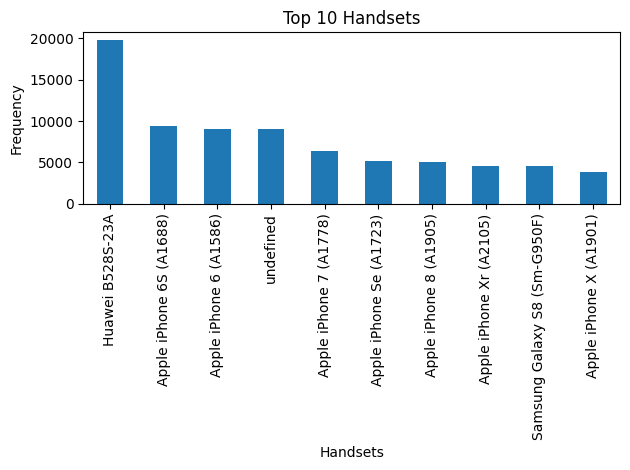

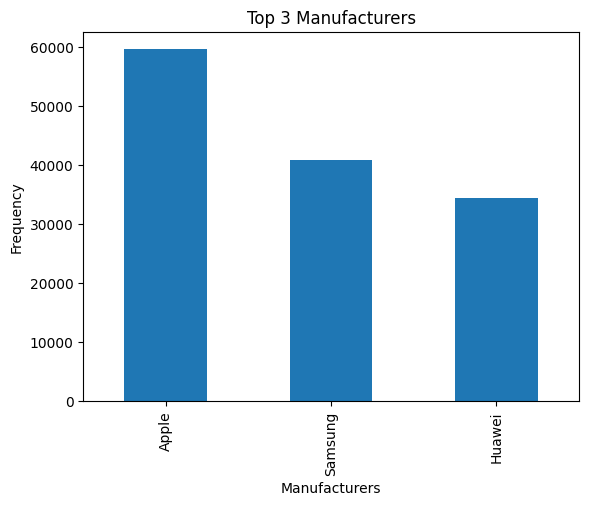

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot top 10 handsets
from IPython.display import display

# Example plotting code
top_handsets.plot(kind="bar", title="Top 10 Handsets", legend=False)
plt.xlabel("Handsets")
plt.ylabel("Frequency")
plt.tight_layout()  # Adjust layout for better readability
plt.show()
# Plot top 3 manufacturers
top_manufacturers.plot(kind="bar", title="Top 3 Manufacturers")
plt.xlabel("Manufacturers")
plt.ylabel("Frequency")
plt.show()

In [49]:
# Grouping by 'IMSI' and aggregating relevant columns
user_behavior = df.groupby("IMSI").agg(
    {
        "Total DL (Bytes)": "sum",  # Sum of download data for each IMSI
        "Total UL (Bytes)": "sum",  # Sum of upload data for each IMSI
        # You can add more columns here as necessary, e.g., if you want to aggregate other columns
    }
)

# Add a new column for total data, if it's not already present
user_behavior["Total Data (Bytes)"] = (
    user_behavior["Total DL (Bytes)"] + user_behavior["Total UL (Bytes)"]
)

# Display the result (optional)
print(user_behavior.head())


              Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
IMSI                                                                
2.040471e+14        78697597.0        60456049.0        1.391536e+08
2.040808e+14       194828056.0        37295915.0        2.321240e+08
2.082001e+14        31376981.0        53794658.0        8.517164e+07
2.082001e+14       392918313.0        33583272.0        4.265016e+08
2.082001e+14       961767023.0        71325004.0        1.033092e+09


In [50]:
print(user_behavior.describe())


       Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
count      1.072660e+05      1.072660e+05        1.072660e+05
mean       6.357743e+08      5.750398e+07        6.932783e+08
std        9.140068e+08      8.009000e+07        9.893354e+08
min        8.827082e+06      2.866892e+06        3.324901e+07
25%        3.148034e+08      3.639252e+07        3.584920e+08
50%        5.700629e+08      4.678069e+07        6.176314e+08
75%        8.070716e+08      6.565887e+07        8.571697e+08
max        2.584708e+11      2.354725e+10        2.820181e+11


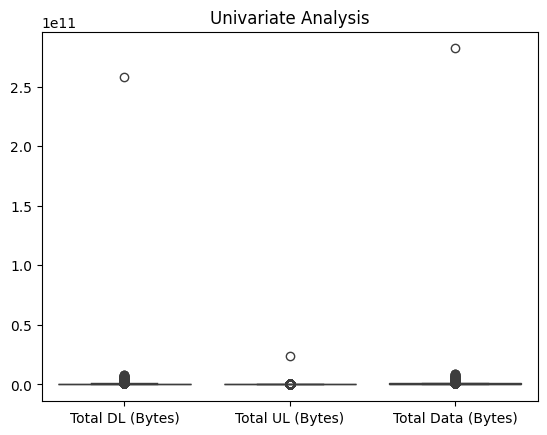

In [51]:
sns.boxplot(data=user_behavior)
plt.title("Univariate Analysis")
plt.show()


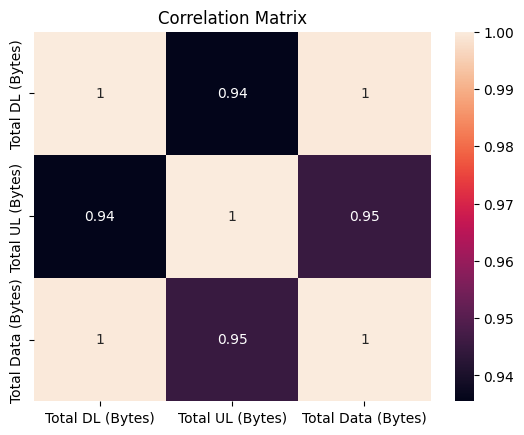

In [52]:
correlation_matrix = user_behavior.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [56]:
from sklearn.decomposition import PCA

# Assuming 'user_behavior' is a DataFrame with numerical values
pca = PCA(n_components=2)
principal_components = pca.fit_transform(user_behavior)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)


[9.99394106e-01 6.05893624e-04]


In [59]:
# Assuming 'IMSI' is the column you want to group by
engagement_metrics = df.groupby("IMSI").agg(
    {
        "IMSI": "count",  # This counts the number of sessions for each IMSI
        "Dur. (ms)": "sum",  # Sum the session duration (in milliseconds)
        "Total DL (Bytes)": "sum",  # Sum the total download data
        "Total UL (Bytes)": "sum",  # Sum the total upload data
    }
)

# Add a new column for total data (bytes)
engagement_metrics["Total Data (Bytes)"] = (
    engagement_metrics["Total DL (Bytes)"] + engagement_metrics["Total UL (Bytes)"]
)

# Rename the count column to 'Session Count'
engagement_metrics.rename(columns={"IMSI": "Session Count"}, inplace=True)

# Display the result
print(engagement_metrics)


              Session Count  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
IMSI                                                                         
2.040471e+14              1   869844.0        78697597.0        60456049.0   
2.040808e+14              1   877385.0       194828056.0        37295915.0   
2.082001e+14              1    86019.0        31376981.0        53794658.0   
2.082001e+14              1    86254.0       392918313.0        33583272.0   
2.082001e+14              2   573923.0       961767023.0        71325004.0   
...                     ...        ...               ...               ...   
2.082099e+14              1   127367.0       688815403.0        33888182.0   
2.082099e+14              1   168543.0       451173021.0        44692550.0   
2.082099e+14              1    86399.0       307825104.0        30355487.0   
2.082522e+14              1    56613.0       800629358.0        45083854.0   
2.140743e+14              1   226790.0       637123579.0        

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics)


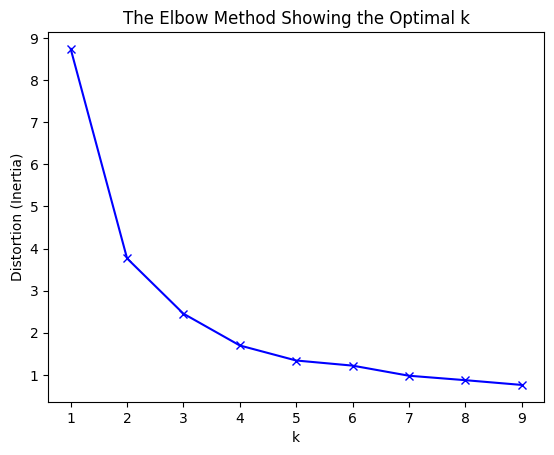

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'normalized_metrics' is your dataset
distortions = []
K = range(1, 10)  # Range for different k values

# Loop through each k, fit the model, and calculate the distortion (inertia)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)  # Make sure 'normalized_metrics' is your data
    distortions.append(kmeans.inertia_)  # Store inertia value for each k

# Plot the distortions (inertia) for each k to visualize the elbow point
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion (Inertia)")
plt.title("The Elbow Method Showing the Optimal k")
plt.show()


In [63]:
kmeans = KMeans(n_clusters=3)
engagement_clusters = kmeans.fit_predict(normalized_metrics)
engagement_metrics["Cluster"] = engagement_clusters


In [71]:
# Remove any leading/trailing spaces from column names
engagement_metrics.columns = engagement_metrics.columns.str.strip()

# Check the columns to verify they have been cleaned properly
print(engagement_metrics.columns)


Index(['Session Count', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
       'Total Data (Bytes)', 'Cluster'],
      dtype='object')


In [72]:
# Aggregating the data by 'Cluster' and calculating the mean, min, and max for each column
cluster_summary = engagement_metrics.groupby("Cluster").agg(
    {
        "Session Count": ["mean", "min", "max"],
        "Dur. (ms)": ["mean", "min", "max"],
        "Total Data (Bytes)": ["mean", "min", "max"],
    }
)

# Print the result
print(cluster_summary)


        Session Count               Dur. (ms)                              \
                 mean  min  max          mean           min           max   
Cluster                                                                     
0            1.220468    1    4  1.130992e+05  7.142000e+03  4.517680e+05   
1          570.000000  570  570  3.761205e+07  3.761205e+07  3.761205e+07   
2            3.218254    1   18  4.930964e+05  8.555400e+04  1.855375e+07   

        Total Data (Bytes)                              
                      mean           min           max  
Cluster                                                 
0             5.991582e+08  3.324901e+07  2.439177e+09  
1             2.820181e+11  2.820181e+11  2.820181e+11  
2             1.658007e+09  5.714004e+07  8.846226e+09  


In [74]:
# Clean column names by stripping spaces
df.columns = df.columns.str.strip()


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


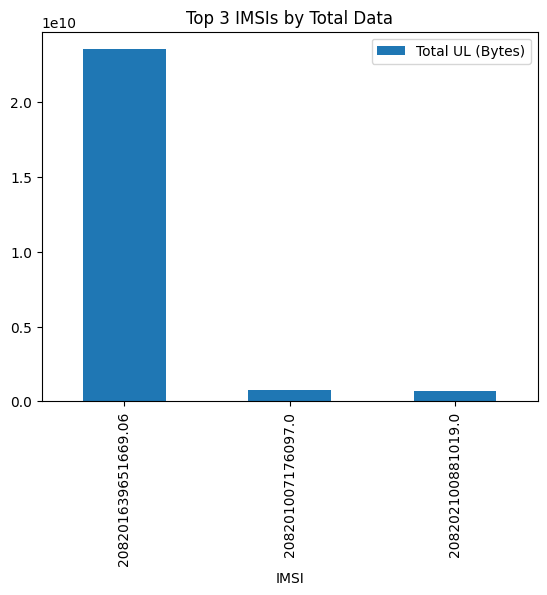

In [76]:
# Clean column names (if needed)
df.columns = df.columns.str.strip()

# Check the exact column name
print(df.columns)

# Perform aggregation with the correct column name
application_traffic = (
    df.groupby("IMSI")  # Group by IMSI or another relevant identifier
    .agg(
        {
            "Total UL (Bytes)": "sum",  # Replace with the correct column if needed
        }
    )
    .sort_values("Total UL (Bytes)", ascending=False)
)

# Plot top 3 IMSIs (or use another identifier)
application_traffic.head(3).plot(kind="bar")
plt.title("Top 3 IMSIs by Total Data")
plt.show()


In [19]:
top_handsets = df["Handset Type"].value_counts().head(10)
print(top_handsets)


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [20]:
top_manufacturers = df["Handset Manufacturer"].value_counts().head(3)
print(top_manufacturers)


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [21]:
top_manufacturer_handsets = {}
for manufacturer in top_manufacturers.index:
    handsets = (
        df[df["Handset Manufacturer"] == manufacturer]["Handset Type"]
        .value_counts()
        .head(5)
    )
    top_manufacturer_handsets[manufacturer] = handsets
print(top_manufacturer_handsets)


{'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64, 'Huawei': Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64}


In [22]:
user_aggregate = df.groupby("MSISDN/Number").agg(
    {
        "Social Media DL (Bytes)": "sum",
        "Social Media UL (Bytes)": "sum",
        "Google DL (Bytes)": "sum",
        "Google UL (Bytes)": "sum",
        "Email DL (Bytes)": "sum",
        "Email UL (Bytes)": "sum",
        "Youtube DL (Bytes)": "sum",
        "Youtube UL (Bytes)": "sum",
        "Netflix DL (Bytes)": "sum",
        "Netflix UL (Bytes)": "sum",
        "Gaming DL (Bytes)": "sum",
        "Gaming UL (Bytes)": "sum",
        "Other DL (Bytes)": "sum",
        "Other UL (Bytes)": "sum",
    }
)
